In [1]:
import numpy as np
np.random.seed(0) 
import pandas as pd

In [2]:
#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import backend as K

#Keras
#import keras
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPool2D, Flatten
#from keras.layers import Dense, Dropout

import lightgbm as lgb
from sklearn.metrics import accuracy_score


%matplotlib inline
import matplotlib.pyplot as plt

from functools import partial
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

import scikitplot as skplt

from livelossplot.tf_keras import PlotLossesCallback

# Label   Description
0.   T-shirt/top
1.   Trouser
2.   Pullover
3.   Dress
4.   Coat
5.   Sandal
6.   Shirt
7.   Sneaker
8.   Bag
9.   Ankle boot

In [3]:
describtion_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4 : 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',       
}

### LOADING DATA

In [4]:
train= pd.read_csv(r'C:\Users\Seba\Documents\python\datasets-pyth\fashionmnist\fashion-mnist_train.csv')
test = pd.read_csv(r'C:\Users\Seba\Documents\python\datasets-pyth\fashionmnist\fashion-mnist_test.csv')

In [5]:
X_train = train.drop('label',axis=1).values
y_train = train['label'].values

X_test = test.drop('label',axis=1).values
y_test = test['label'].values

In [6]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [7]:
#reshaping
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

#scaling dataset
X_train = X_train/255
X_test = X_test/255

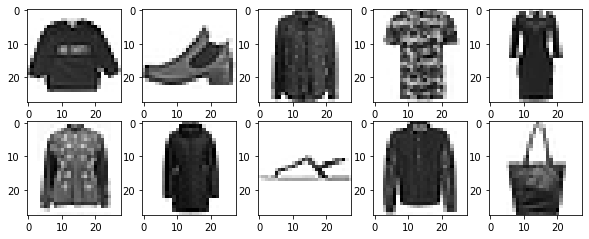

In [8]:
#Some examples of dataset 
plt.figure(figsize=(10,10))
for i in range(0,10):
    plt.subplot(5,5,i+1)
    plt.imshow(1-X_train[i][:, :, 0], cmap='gray', interpolation='none')

In [9]:
train= pd.read_csv(r'C:\Users\Seba\Documents\python\datasets-pyth\fashionmnist\fashion-mnist_train.csv')
test = pd.read_csv(r'C:\Users\Seba\Documents\python\datasets-pyth\fashionmnist\fashion-mnist_test.csv')

In [10]:
X_train = train.drop('label',axis=1).values
y_train = train['label'].values

X_test = test.drop('label',axis=1).values
y_test = test['label'].values

# data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#reshaping
X_train /= 255
X_test /= 255

input_dim = X_train.shape[1]
num_classes = 10

# one-hot encoding for target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
input_dim= X_train.shape[1]
model = Sequential([
        Dense(512, input_dim=input_dim, activation='relu'),
        Dropout(0.2),
        
        Dense(256, activation='relu'),
        Dropout(0.2),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

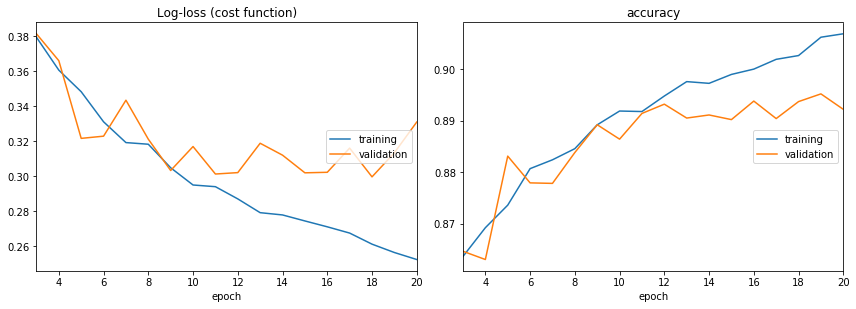

Log-loss (cost function):
training   (min:    0.253, max:    0.541, cur:    0.253)
validation (min:    0.300, max:    0.427, cur:    0.331)

accuracy:
training   (min:    0.805, max:    0.907, cur:    0.907)
validation (min:    0.844, max:    0.895, cur:    0.892)
60000/60000 - 6s - loss: 0.2526 - accuracy: 0.9069 - val_loss: 0.3309 - val_accuracy: 0.8922


In [12]:
plot_losses = PlotLossesCallback()
history = model.fit(X_train, y_train,
        batch_size=32,
        epochs=20, 
        callbacks=[plot_losses],
        verbose=2,
        validation_data=(X_test, y_test))

In [13]:
def get_diff(y_test, y_pred):
    for idx, (a, b) in enumerate(zip(y_test, y_pred)):
        if np.argmax(a) == np.argmax(b): continue
        yield idx, np.argmax(a), np.argmax(b)

def plot_fail_predictions(limit=20):
    
    y_pred = model.predict(X_test)
    limit = 20
    cur_limit = 0
    fig = plt.figure(figsize=(10, 10))
    X_test_plot = X_test.reshape( [10000,28,28] )

    for it, (idx, y_test_val, y_pred_val) in enumerate(get_diff(y_test, y_pred)):
        if cur_limit > limit: break

        plt.subplot(5,5,it+1)
        plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
        plt.title('y_true={0}\ny_pred={1}'.format(y_test_val, y_pred_val))
        plt.tight_layout()

        cur_limit += 1

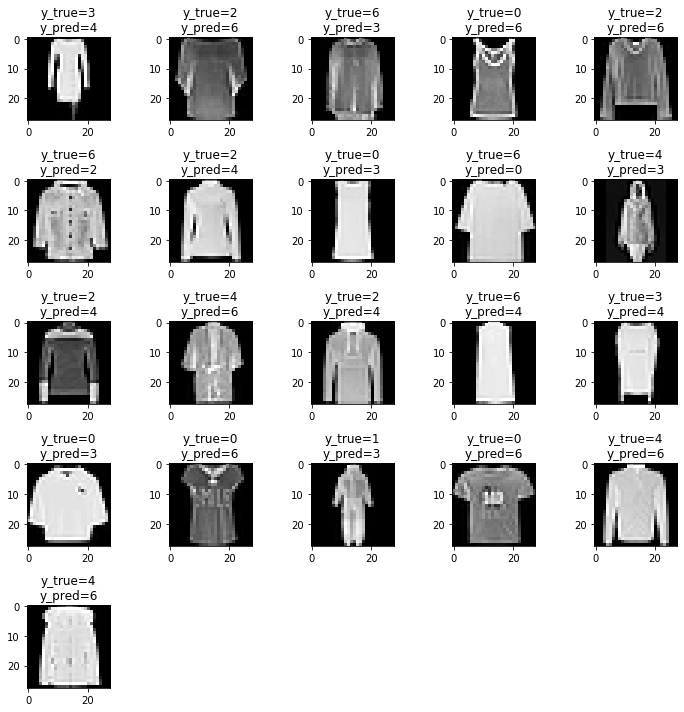

In [14]:
plot_fail_predictions()

# Convolution Neutral Networks

In [15]:
train= pd.read_csv(r'C:\Users\Seba\Documents\python\datasets-pyth\fashionmnist\fashion-mnist_train.csv')
test = pd.read_csv(r'C:\Users\Seba\Documents\python\datasets-pyth\fashionmnist\fashion-mnist_test.csv')

In [16]:
X_train = train.drop('label',axis=1).values
y_train = train['label'].values

X_test = test.drop('label',axis=1).values
y_test = test['label'].values

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [17]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
assert(X_train.shape == (60000, 28, 28, 1))    
assert(X_test.shape == (10000, 28, 28, 1))  

In [18]:
# data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#reshaping
X_train /= 255
X_test /= 255

num_classes = 10

# one-hot encoding dla zmiennej docelowej
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
def get_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'),
        Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(),
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

get_cnn().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

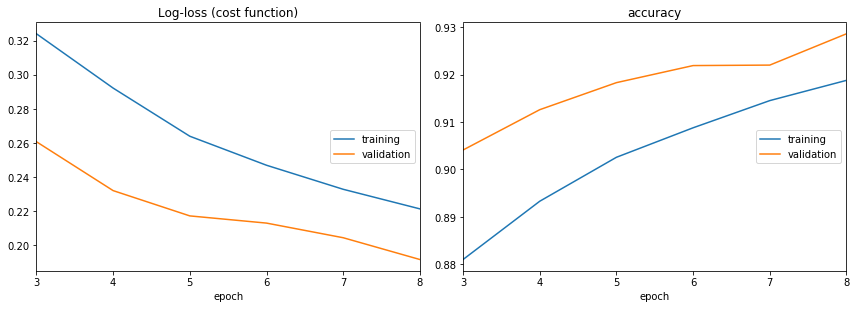

Log-loss (cost function):
training   (min:    0.221, max:    0.707, cur:    0.221)
validation (min:    0.192, max:    0.388, cur:    0.192)

accuracy:
training   (min:    0.733, max:    0.919, cur:    0.919)
validation (min:    0.862, max:    0.929, cur:    0.929)
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.2214 - accuracy: 0.9188 - val_loss: 0.1918 - val_accuracy: 0.9286


In [10]:
plot_losses = PlotLossesCallback()
model = get_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=8,
          verbose=1,
          callbacks=[plot_losses],
          validation_data=(X_test, y_test))

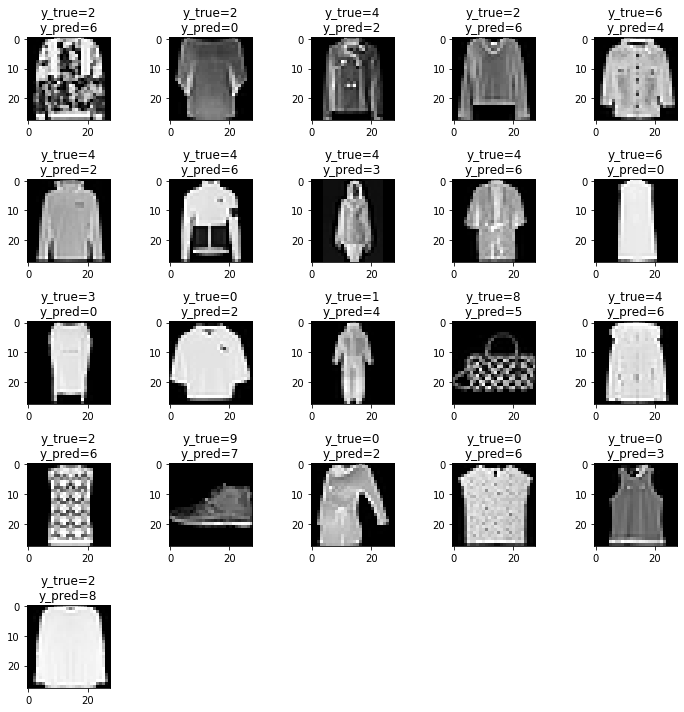

In [13]:
plot_fail_predictions()

In [30]:
true_values= []
predictions = []
list_idx = []
for idx, (a, b) in enumerate(zip(y_test, preds)):
    #if np.argmax(a) == np.argmax(b): continue
    true_values.append(np.argmax(a))
    predictions.append(np.argmax(b))
    list_idx.append(idx)


        
error_frame = pd.DataFrame({
                'true_values' : true_values,
                'predictions' : predictions,
                'idx':
                           })

for p in range(0,10):
    error_frame['{}_prob'.format(p)] = ['NaN' for x in range(0,error_frame.shape[0])]
    
for n in range(0,10000):
    for t in range(0,10):
        error_frame[error_frame.columns[t+2]][n] = preds[n][t]

        
predictions2 = [] 
for n in range(0,10000):
    values = []
    
    for t in range(2,12):
        values.append(error_frame[error_frame.columns[t]][n])
    second_value = 0
    counter = 0
    for t in range(0,10):
        if values[t] < np.max(values):
            if values[t] > second_value:
                second_value = values[t]  
                counter= t
    predictions2.append(counter)
    
error_frame['predictions2'] = predictions2


#model return always class for which  predicted probability is the highest, predictions2 is created column with second highest probability 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
pred_2 = error_frame.pop('predictions2')
col_name = 'predictions2'
error_frame.insert(2,col_name,pred_2)

In [65]:
error_frame[error_frame['true_values'] != error_frame['predictions'] ]

,true_values,predictions,predictions2,0_prob,1_prob,2_prob,3_prob,4_prob,5_prob,6_prob,7_prob,8_prob,9_prob,prob_under_20
3,2,6,8,0.0549028,0.0280343,0.162745,0.0132672,0.140911,0.000686951,0.435153,0.000487233,0.163345,0.000467151,NaN
5,2,0,6,0.414289,1.20688e-05,0.177844,0.00263296,8.58179e-05,1.06866e-05,0.404791,9.92698e-07,0.000331917,1.49506e-06,NaN
11,4,2,4,0.00154886,0.000246663,0.432373,0.000960396,0.300651,0.000222571,0.259566,6.20622e-05,0.00413431,0.00023494,NaN
40,2,6,2,0.00286885,3.33698e-05,0.42337,0.000159679,0.00711582,9.26539e-06,0.566366,9.88134e-07,6.22111e-05,1.43489e-05,NaN
43,6,4,6,0.00363723,4.14423e-05,0.0742794,0.00439471,0.77803,2.64581e-06,0.139277,1.1825e-05,0.000318128,7.61376e-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,4,3,4,0.00474707,0.000611605,0.00357772,0.787077,0.178704,2.1943e-05,0.0242294,7.45985e-05,0.000936901,2.01594e-05,NaN
9897,0,6,3,0.0139919,8.39778e-05,0.0535132,0.294783,0.277583,6.88584e-05,0.358625,0.000203849,0.00110268,4.47572e-05,NaN
9955,4,6,4,0.00079396,0.000143569,0.0272049,0.0018822,0.236347,1.23046e-05,0.731361,1.58769e-05,0.00221824,2.1834e-05,NaN
9961,6,4,3,0.000122666,4.7747e-05,0.000993263,0.408442,0.461098,5.82495e-07,0.12926,9.18997e-06,2.6059e-05,9.31043e-07,NaN


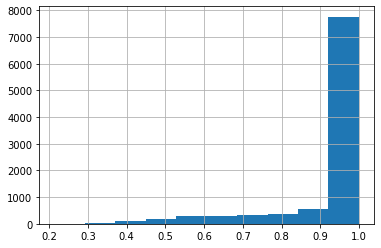

In [53]:
#probability for main predictions
error_frame.apply(lambda x: x[x[1]+3],axis=1 ).hist()

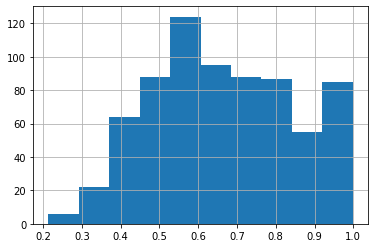

In [52]:
#probability for fail predictions
error_frame[error_frame['true_values'] != error_frame['predictions'] ].apply(lambda x: x[x[1]+3],axis=1 ).hist()

Most class(near 8000) is predicted with probability above 90%.

In [71]:
# predicted true class with probability below 40% 
error_frame['prob_below_40']=error_frame[error_frame['true_values'] == error_frame['predictions'] ].apply(lambda x: 1 if x[x[1]+3] < 0.4 else 0,axis=1 )
error_frame[error_frame['prob_below_40']==1].reset_index()

,index,true_values,predictions,predictions2,0_prob,1_prob,2_prob,3_prob,4_prob,5_prob,6_prob,7_prob,8_prob,9_prob,prob_under_20,prob_under_40
0,167,8,8,2,0.0520676,0.00375894,0.343253,0.0250543,0.0826314,0.000893678,0.123915,0.000316354,0.36754,0.00057005,1.0,1.0
1,451,0,0,2,0.390838,2.48484e-05,0.269813,0.112783,0.00276632,2.23249e-05,0.22335,1.92609e-05,0.000372041,1.19593e-05,1.0,1.0
2,925,6,6,1,0.0803508,0.21481,0.0527797,0.15483,0.134834,0.0016572,0.344657,0.00130784,0.0123478,0.00242701,1.0,1.0
3,966,3,3,6,0.141844,0.040314,0.00130157,0.347252,0.00256422,0.078435,0.193279,0.0287997,0.0216949,0.144516,1.0,1.0
4,2177,3,3,6,0.214416,0.00341461,0.0578483,0.390193,0.0268403,0.000209594,0.301554,0.00038171,0.00498199,0.000160892,1.0,1.0
5,2188,8,8,7,0.00255957,0.00109058,9.82642e-05,0.0014829,0.000208434,0.00160753,0.00108163,0.303559,0.390796,0.297516,1.0,1.0
6,2721,1,1,2,0.0974318,0.335262,0.222543,0.0231706,0.0555852,0.0156395,0.0691567,0.00315306,0.175626,0.00243231,1.0,1.0
7,2843,6,6,4,0.0227261,0.0273275,0.0862601,0.249441,0.26731,0.000303791,0.342715,0.000294182,0.0032289,0.000394424,1.0,1.0
8,3103,3,3,6,0.087904,0.000664097,0.158952,0.349154,0.0969004,0.000819103,0.284776,0.00290684,0.0175836,0.000339629,1.0,1.0
9,3558,0,0,6,0.387118,0.00867655,0.00716403,0.284383,0.00153758,0.000665074,0.306727,0.00015193,0.00348762,8.96132e-05,1.0,1.0


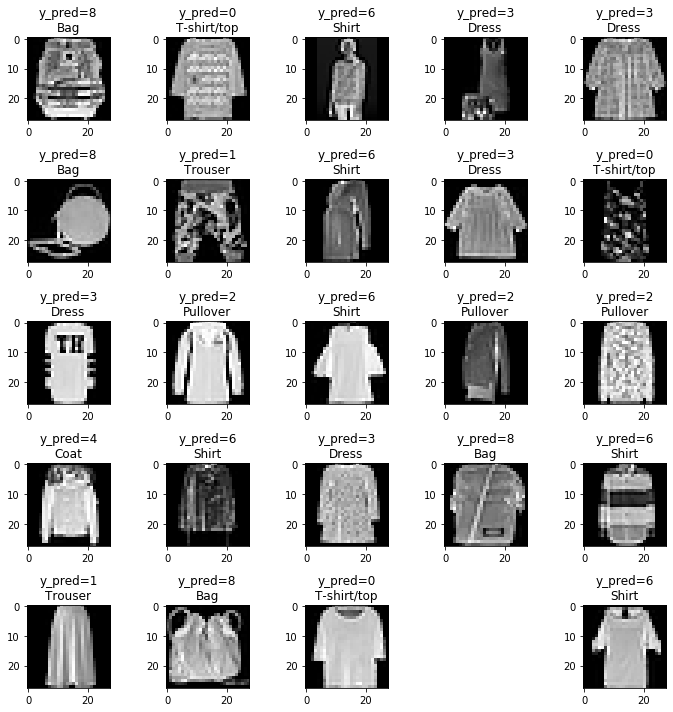

In [83]:
df1 = error_frame[error_frame['prob_below_40']==1].reset_index()
limit = 24
cur_limit = 0
fig = plt.figure(figsize=(10, 10))
X_test_plot = X_test.reshape( [10000,28,28] )

for it, (idx, y_pred_val) in enumerate(zip(df1['index'],df1['predictions'])):
    if cur_limit > limit: break

    plt.subplot(5,5,it+1)
    plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
    plt.title('y_pred={0}\n{1}'.format(y_pred_val,describtion_dict[y_pred_val]))#nazwa z listy
    plt.tight_layout()

    cur_limit += 1

In [86]:
# fail predicted class with probability above 90%

error_frame['prob_above_90']=error_frame[error_frame['true_values'] != error_frame['predictions'] ].apply(lambda x: 1 if x[x[1]+3] > 0.9 else 0,axis=1 )
error_frame[error_frame['prob_above_90']==1].reset_index()

,index,true_values,predictions,predictions2,0_prob,1_prob,2_prob,3_prob,4_prob,5_prob,6_prob,7_prob,8_prob,9_prob,prob_under_20,prob_under_40,prob_above_90
0,91,4,6,4,0.00357569,9.66817e-06,0.000705955,0.0081879,0.0369191,8.22243e-07,0.950529,2.44489e-06,6.85279e-05,6.5257e-07,NaN,1.0,1.0
1,305,6,2,6,0.0125731,3.07392e-05,0.965711,0.000225403,0.000291747,1.15454e-05,0.016049,7.18701e-07,0.00510272,3.8875e-06,NaN,1.0,1.0
2,329,4,6,4,1.51235e-06,8.43983e-09,6.03383e-05,6.39154e-07,0.0109941,2.47717e-10,0.988943,1.00148e-10,5.21767e-08,1.0878e-09,NaN,1.0,1.0
3,370,6,8,4,0.000198606,1.19515e-05,0.000145052,0.000261363,0.00356402,6.75141e-05,0.000213505,4.18358e-05,0.995489,7.42216e-06,NaN,1.0,1.0
4,410,9,7,9,7.94721e-06,2.66662e-06,3.09571e-06,8.51218e-06,1.58108e-06,0.00156636,7.04642e-06,0.970912,7.65978e-06,0.0274831,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,9619,0,6,0,0.0577489,3.28848e-05,0.000167038,0.000934167,0.000464505,4.48421e-07,0.940606,1.80676e-07,4.41198e-05,1.5285e-06,NaN,1.0,1.0
100,9625,6,2,6,0.0436793,0.000276239,0.904113,0.00152483,0.000680524,0.000144423,0.0463954,4.77863e-06,0.00316385,1.77732e-05,NaN,1.0,1.0
101,9634,7,9,7,6.77487e-07,3.37885e-06,4.99098e-08,5.84239e-07,1.40929e-07,7.26457e-05,3.30629e-07,0.0245916,3.42992e-06,0.975327,NaN,1.0,1.0
102,9692,0,8,0,0.0650612,3.45235e-05,0.00188606,0.000144557,0.000102361,0.000124554,0.0279704,4.28853e-05,0.904298,0.000335504,NaN,1.0,1.0


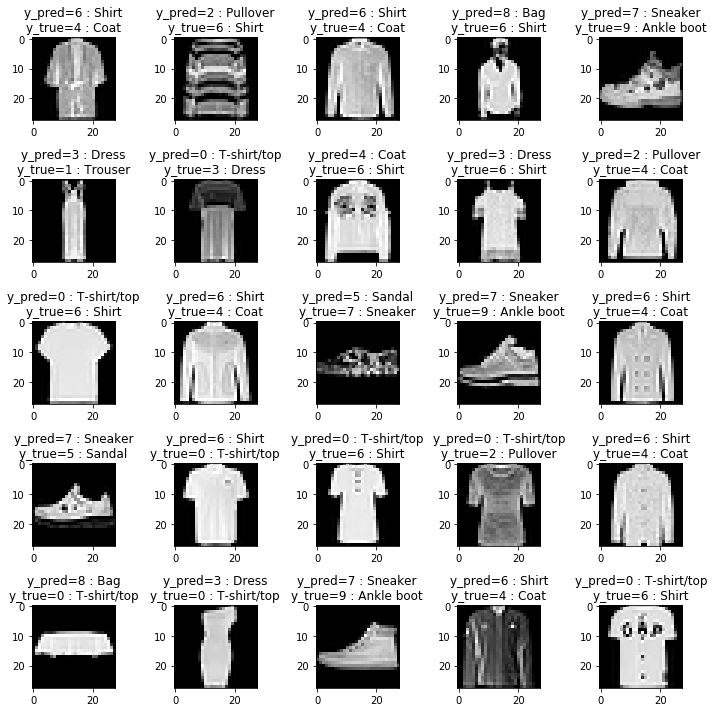

In [87]:
df1 = error_frame[error_frame['prob_above_90']==1].reset_index()
limit = 24
cur_limit = 0
fig = plt.figure(figsize=(10, 10))
X_test_plot = X_test.reshape( [10000,28,28] )

for it, (idx, y_pred_val,y_true) in enumerate(zip(df1['index'],df1['predictions'],df1['true_values'])):
    if cur_limit > limit: break

    plt.subplot(5,5,it+1)
    plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
    plt.title('y_pred={0} : {1}\ny_true={2} : {3}'.format(y_pred_val,describtion_dict[y_pred_val],y_true,describtion_dict[y_true]))#nazwa z listy
    plt.tight_layout()

    cur_limit += 1

## LGBM

In [22]:
from numba import vectorize,jit,njit

I decided to use only LGBM model cause of model training and predicting time. In MNIST project LGBM give similar accuracy as other boosted trees models so I expect here the same.  


In [19]:
train= pd.read_csv(r'C:\Users\Seba\Documents\python\datasets-pyth\fashionmnist\fashion-mnist_train.csv')
test = pd.read_csv(r'C:\Users\Seba\Documents\python\datasets-pyth\fashionmnist\fashion-mnist_test.csv')



In [20]:
X_train = train.drop('label',axis=1).values
y_train = train['label'].values

X_test = test.drop('label',axis=1).values
y_test = test['label'].values

In [21]:
#reshaping
X_train = X_train/255
X_test = X_test/255

In [26]:
%%time
model = lgb.LGBMClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Accuracy :', accuracy_score(y_test,y_pred))

Accuracy : 0.8998
Wall time: 1min 57s


In [99]:
def objective(space):
    
    lgb_params = {
        'max_depth': int(space['max_depth']),
        'colsample_bytree': space['colsample_bytree'],
        'learning_rate': space['learning_rate'],
        'subsample': space['subsample'],
        'random_state': int(space['random_state']),
        'min_child_weight': int(space['min_child_weight']),
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'n_estimators': 100,
        'objective': 'reg:squarederror'
    }
    
    model = lgb.LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = -accuracy_score(y_test, y_pred)
    
    return{'loss':score, 'status': STATUS_OK }
    
space ={
    'max_depth': hp.quniform ('x_max_depth', 5, 20, 1),
    'colsample_bytree': hp.uniform ('x_colsample_bytree', 0.8, 1.),
    'learning_rate': hp.uniform ('x_learning_rate', 0.05, 0.2),
    'subsample': hp.uniform ('x_subsample', 0.7, 1.),
    'random_state': hp.quniform ('x_random_state', 0, 10000, 50),
    'min_child_weight': hp.quniform ('x_min_child_weight', 1, 10, 1),
    'reg_alpha': hp.loguniform ('x_reg_alpha', 0., 1.),
    'reg_lambda': hp.uniform ('x_reg_lambda', 0.7, 1.),
}


trials = Trials()
best_params = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=1),
            max_evals=10,
            trials=trials)

print("The best params: ", best_params)


100%|███████████████████████████████████████████████████████████| 10/10 [13:11<00:00, 79.17s/trial, best loss: -0.9082]
The best params:  {'x_colsample_bytree': 0.9753467596624951, 'x_learning_rate': 0.19637846260613454, 'x_max_depth': 7.0, 'x_min_child_weight': 10.0, 'x_random_state': 9000.0, 'x_reg_alpha': 1.9323156040199232, 'x_reg_lambda': 0.8644983413158713, 'x_subsample': 0.7197619299389291}


In [33]:
best_params = {'x_colsample_bytree': 0.9753467596624951, 
                'x_learning_rate': 0.19637846260613454, 
                'x_max_depth': 7.0, 
                'x_min_child_weight': 10.0,
                'x_random_state': 9000.0,
                'x_reg_alpha': 1.9323156040199232, 
                'x_reg_lambda': 0.8644983413158713, 
                'x_subsample': 0.7197619299389291
               }

Wall time: 24min 46s


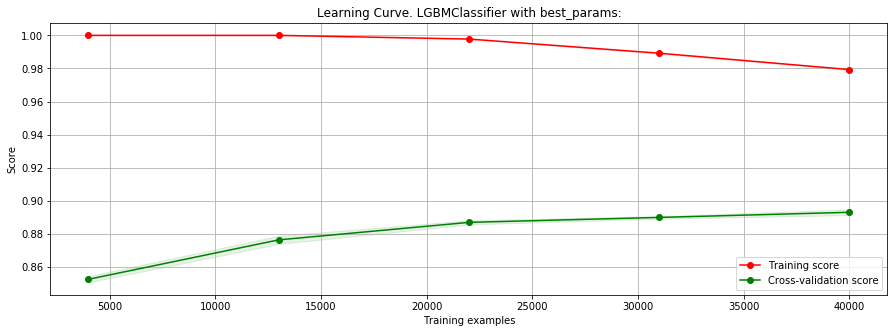

In [36]:
%%time
model = lgb.LGBMClassifier(**best_params)
model.fit(X_train,y_train)
title='Learning Curve. {0}:'.format('LGBMClassifier with best_params')
skplt.estimators.plot_learning_curve(model, X_train,y_train,title=title,figsize=(15, 5), cv=3, scoring='accuracy')

# ACCURACY SUMMARY :
1. NN: 0.8922
2. CNN: 0.9286
3. CTB: 0.8998


In this example CNN again give the best accuracy same as in classic MNIST. NN and CTB give similar results.